In [1]:
# import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from nbodykit.source.catalog.file import BigFileCatalog
from nbodykit.source.mesh import BigFileMesh
from nbodykit.lab import FFTPower, HaloCatalog

ImportError: libgfortran.so.4: cannot open shared object file: No such file or directory

In [ ]:
from pmesh.pm import ParticleMesh, RealField
from nbodykit.lab import FFTPower

bs, nc = 1000, 256
pm = ParticleMesh(Nmesh=[nc]*3, BoxSize=bs)


In [4]:
sys.path.append('../../contrasative_cosmology/src/')
import halos as Halos
import galaxies as Galaxies
import tools, hodtools


ModuleNotFoundError: No module named 'halotools'

In [ ]:
sys.path.append('/mnt/home/cmodi/Research/Projects/contrasative_cosmology/src/')
import readfof



In [ ]:
path = '/mnt/ceph/users/cmodi/fastpm/'

In [ ]:
'/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B01_T10_S0005//fof

In [ ]:
# path = '/mnt/ceph/users/cmodi/fastpm/N1024_T10_B1/'
zz = 1
aa = 1/(zz+1)
# fofp = 'fof_0.6667'
fofp = 'fof_0.5000'

path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B01_T10_S0005//'
cat = BigFileCatalog(path + fofp, dataset='LL-0.200/', header='Header')

path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B01_T20_S0005//'
cat2 = BigFileCatalog(path + fofp, dataset='LL-0.200/', header='Header')

path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B02_T10_S0005//'
cat3 = BigFileCatalog(path + fofp, dataset='LL-0.200/', header='Header')

path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B02_T20_S0005//'
cat4 = BigFileCatalog(path + fofp, dataset='LL-0.200/', header='Header')

path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B03_T10_S0005//'
cat5 = BigFileCatalog(path + fofp, dataset='LL-0.200/', header='Header')

path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B03_T20_S0005//'
cat6 = BigFileCatalog(path + fofp, dataset='LL-0.200/', header='Header')


In [ ]:
# path = '/mnt/ceph/users/cmodi/fastpm/Quijote/L1000_N1024_B01_T10_S0005//'
# catq = BigFileCatalog(path + 'fof_1.0000', dataset='LL-0.200/', header='Header')


In [ ]:
mp = float(cat.attrs['M0'] * 1e10)
rsdfac = float(cat.attrs['RSDFactor'])


In [ ]:
y, x = np.histogram(np.log10(mp*cat['Length'].compute()))
plt.plot(x[:-1], y, marker='.')
y, x = np.histogram(np.log10(mp*cat2['Length'].compute()))
plt.plot(x[:-1], y, marker='.')
y, x = np.histogram(np.log10(mp*cat3['Length'].compute()))
plt.plot(x[:-1], y, marker='.')

plt.semilogy()
# plt.loglog()


In [ ]:
idx = 0
halos = Halos.Quijote_fiducial_HR(idx, z=zz, finder='fof')
pos = halos['Position'].compute()
mass  = halos['Mass'].compute()


In [ ]:
y, x = np.histogram(np.log10(mp*cat['Length'].compute()))
plt.plot(x[:-1], y, marker='.')
y, x = np.histogram(np.log10(mp*cat2['Length'].compute()))
plt.plot(x[:-1], y, marker='.')
y, x = np.histogram(np.log10(mp*cat3['Length'].compute()))
plt.plot(x[:-1], y, marker='.')
y, x = np.histogram(np.log10(mp*cat4['Length'].compute()))
plt.plot(x[:-1], y, marker='.')

y2, x2 = np.histogram(np.log10(mass))
plt.plot(x2[:-1], y2, 'k', marker='.')

plt.semilogy()
plt.grid(which = 'both')# plt.loglog()


In [555]:
mbins = np.logspace(12.5, 15., 50)
mh = (mbins[1:] * mbins[:-1])**.5
nh = np.histogram(mp*cat['Length'].compute(), bins=mbins)[0]
nh2 = np.histogram(mp*cat2['Length'].compute(), bins=mbins)[0]
nh3 = np.histogram(mp*cat3['Length'].compute(), bins=mbins)[0]
nh4 = np.histogram(mp*cat4['Length'].compute(), bins=mbins)[0]
nh5 = np.histogram(mp*cat5['Length'].compute(), bins=mbins)[0]
nh6 = np.histogram(mp*cat6['Length'].compute(), bins=mbins)[0]


# scale = mass.max() /(mp*cat['Length'].compute().max())
# snh = np.histogram(mp*cat['Length'].compute()*scale, bins=mbins)[0]
# scale = mass.max() /(mp*cat2['Length'].compute().max())
# snh2 = np.histogram(mp*cat2['Length'].compute()*scale, bins=mbins)[0]
# scale = mass.max() /(mp*cat3['Length'].compute().max())
# snh3 = np.histogram(mp*cat3['Length'].compute()*scale, bins=mbins)[0]
# scale = mass.max() /(mp*cat4['Length'].compute().max())
# snh4 = np.histogram(mp*cat4['Length'].compute()*scale, bins=mbins)[0]
# scale = mass.max() /(mp*cat5['Length'].compute().max())
# snh5 = np.histogram(mp*cat5['Length'].compute()*scale, bins=mbins)[0]

nhbody = np.histogram(mass, bins=mbins)[0]

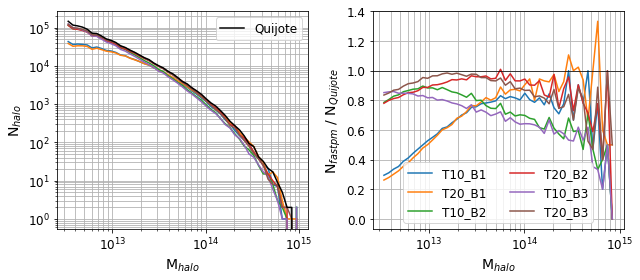

In [556]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].plot(mh, nh)
ax[0].plot(mh, nh2)
ax[0].plot(mh, nh3)
ax[0].plot(mh, nh4)
ax[0].plot(mh, nh5)
ax[0].plot(mh, nh6)
ax[0].plot(mh, nhbody, 'k', label='Quijote')
ax[0].loglog()
ax[0].set_ylabel('N$_{halo}$', fontsize=14)

ax[1].plot(mh, nh/nhbody, label='T10_B1')
ax[1].plot(mh, nh2/nhbody, label='T20_B1')
ax[1].plot(mh, nh3/nhbody, label='T10_B2')
ax[1].plot(mh, nh4/nhbody, label='T20_B2')
ax[1].plot(mh, nh5/nhbody, label='T10_B3')
ax[1].plot(mh, nh6/nhbody, label='T20_B3')
ax[1].axhline(1, color='k', lw=0.7)
ax[1].semilogx()
ax[1].set_ylabel('N$_{fastpm}$ / N$_{Quijote}$', fontsize=14)

for axis in ax:
    axis.legend(fontsize=12, ncol=2)
    axis.grid(True, which = 'both')
    axis.set_xlabel('M$_{halo}$', fontsize=14)
    axis.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()    

In [468]:
# plt.plot(mh, snh/nhbody, label='T10_B1')
# plt.plot(mh, snh2/nhbody, label='T20_B1')
# plt.plot(mh, snh3/nhbody, label='T10_B2')
# plt.plot(mh, snh4/nhbody, label='T20_B2')

# plt.semilogx()
# # plt.ylim(0.8, 1.2)
# plt.grid(which='both')

# plt.legend(bbox_to_anchor=(1, 1))

# power spectrum

In [563]:
numd = 1e-3
num = int(numd*bs**3)

mesh = pm.paint(cat['Position'][:num].compute())
mesh2 = pm.paint(cat2['Position'][:num].compute())
mesh3 = pm.paint(cat3['Position'][:num].compute())
mesh4 = pm.paint(cat4['Position'][:num].compute())
mesh5 = pm.paint(cat5['Position'][:num].compute())
mesh6 = pm.paint(cat6['Position'][:num].compute())

meshnb = pm.paint(pos[:num])
pknb = FFTPower(meshnb/meshnb.cmean(), mode='1d').power['power']


In [564]:

k = FFTPower(mesh/mesh.cmean(), mode='1d').power['k'].real
modes = FFTPower(mesh/mesh.cmean(), mode='1d').power['modes'].real
pk = FFTPower(mesh/mesh.cmean(), mode='1d').power['power'].real
pk2 = FFTPower(mesh2/mesh2.cmean(), mode='1d').power['power'].real
pk3 = FFTPower(mesh3/mesh3.cmean(), mode='1d').power['power'].real
pk4 = FFTPower(mesh4/mesh4.cmean(), mode='1d').power['power'].real
pk5 = FFTPower(mesh5/mesh5.cmean(), mode='1d').power['power'].real
pk6 = FFTPower(mesh6/mesh6.cmean(), mode='1d').power['power'].real
pknb = FFTPower(meshnb/meshnb.cmean(), mode='1d').power['power'].real

pkx = FFTPower(mesh/mesh.cmean(), second=meshnb/meshnb.cmean(), mode='1d').power['power'].real
pkx2 = FFTPower(mesh2/mesh2.cmean(), second=meshnb/meshnb.cmean(), mode='1d').power['power'].real
pkx3 = FFTPower(mesh3/mesh3.cmean(), second=meshnb/meshnb.cmean(), mode='1d').power['power'].real
pkx4 = FFTPower(mesh4/mesh4.cmean(), second=meshnb/meshnb.cmean(), mode='1d').power['power'].real
pkx5 = FFTPower(mesh5/mesh5.cmean(), second=meshnb/meshnb.cmean(), mode='1d').power['power'].real
pkx6 = FFTPower(mesh6/mesh6.cmean(), second=meshnb/meshnb.cmean(), mode='1d').power['power'].real


No handles with labels found to put in legend.
No handles with labels found to put in legend.


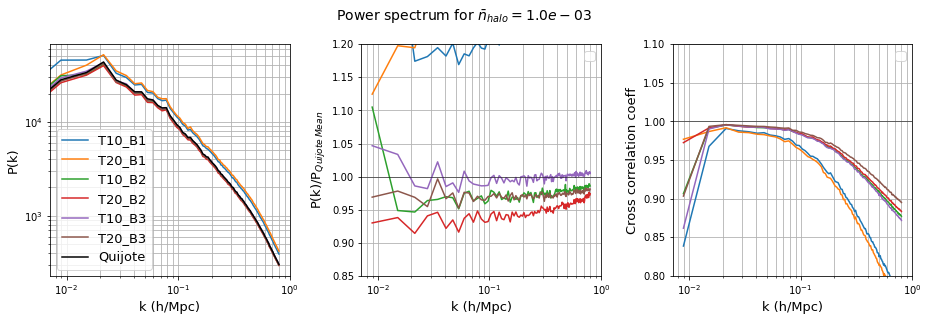

In [565]:
fig, ax = plt.subplots(1, 3, figsize = (13, 4.5))

ax[0].plot(k, pk, label='T10_B1')
ax[0].plot(k, pk2, label='T20_B1')
ax[0].plot(k, pk3, label='T10_B2')
ax[0].plot(k, pk4, label='T20_B2')
ax[0].plot(k, pk5, label='T10_B3')
ax[0].plot(k, pk6, label='T20_B3')
ax[0].plot(k, pknb, color='k', label='Quijote')
# ax[0].plot(k, pkmu, color='k', ls="--", label='Quijote Mean')
ax[0].loglog()
ax[0].set_ylabel('P(k)', fontsize=13)

ax[1].plot(k, pk/pknb)
ax[1].plot(k, pk2/pknb)
ax[1].plot(k, pk3/pknb)
ax[1].plot(k, pk4/pknb)
ax[1].plot(k, pk5/pknb)
ax[1].plot(k, pk6/pknb)
ax[1].axhline(1, color='k', lw=0.5)
ax[1].semilogx()
ax[1].set_ylim(0.85, 1.2)
ax[1].set_ylabel('P(k)/P$_{Quijote\, Mean}$', fontsize=13)

ax[2].plot(k, pkx/(pk*pknb)**0.5)
ax[2].plot(k, pkx2/(pk2*pknb)**0.5)
ax[2].plot(k, pkx3/(pk3*pknb)**0.5)
ax[2].plot(k, pkx4/(pk4*pknb)**0.5)
ax[2].plot(k, pkx5/(pk5*pknb)**0.5)
ax[2].plot(k, pkx6/(pk6*pknb)**0.5)
ax[2].axhline(1, color='k', lw=0.5)
ax[2].semilogx()
ax[2].set_ylim(0.8, 1.1)
ax[2].set_ylabel('Cross correlation coeff', fontsize=13)

for axis in ax:
    axis.set_xlabel('k (h/Mpc)', fontsize=13)
    axis.grid(which='both')
    axis.legend(fontsize=13)
    
plt.suptitle(r"Power spectrum for $\bar{n}_{halo} = %0.1e$"%numd, fontsize=14)
plt.tight_layout()


### Compare against mean 

In [ ]:
# pknbs = []
# for idx in range(10):
#     ihalos = Halos.Quijote_fiducial_HR(idx, z=0, finder='fof')
#     ipos = ihalos['Position'].compute()
    
#     imeshnb = pm.paint(ipos[:num])
#     ipknb = FFTPower(imeshnb/imeshnb.cmean(), mode='1d').power['power'].real
#     pknbs.append(ipknb)
    
# pkmu = np.array(pknbs).mean(axis=0)
# pkstd = np.array(pknbs).std(axis=0)


In [ ]:

# fig, ax = plt.subplots(1, 2, figsize = (12, 4))

# ax[0].plot(k, pk, label='T10_B1')
# ax[0].plot(k, pk2, label='T20_B1')
# ax[0].plot(k, pk3, label='T10_B2')
# ax[0].plot(k, pk4, label='T20_B2')
# ax[0].plot(k, pk5, label='T10_B3')
# ax[0].plot(k, pk6, label='T20_B3')
# ax[0].plot(k, pknb, color='k', label='Quijote')
# ax[0].plot(k, pkmu, color='k', ls="--", label='Quijote Mean')
# ax[0].loglog()
# ax[0].set_ylabel('P(k)', fontsize=13)

# ax[1].plot(k, pk/pkmu)
# # ax[1].plot(k, pk/pknb, 'C0--')
# ax[1].plot(k, pk2/pkmu)
# ax[1].plot(k, pk3/pkmu)
# ax[1].plot(k, pk4/pkmu)
# ax[1].plot(k, pk5/pkmu)
# ax[1].plot(k, pk6/pkmu)
# ax[1].plot(k, pknb/pkmu, 'k', alpha=0.7)
# ax[1].fill_between(k, 1-(2/modes)**.5, 1+(2/modes)**.5, alpha=0.2, label='Cosmic Variance')
# ax[1].fill_between(k, 1-pkstd/pkmu, 1+pkstd/pkmu, alpha=0.2, label='Quijote Variance')
# ax[1].axhline(1, color='k', lw=0.5)
# ax[1].semilogx()
# ax[1].set_ylim(0.85, 1.15)
# ax[1].set_ylabel('P(k)/P$_{Quijote\, Mean}$', fontsize=13)

# for axis in ax:
#     axis.set_xlabel('k (h/Mpc)', fontsize=13)
#     axis.grid(which='both')
#     axis.legend(fontsize=13)
    
# plt.suptitle(r"Power spectrum for $\bar{n}_{halo} = %0.1e$"%numd, fontsize=14)
# # plt.suptitle(r"Power spectrum for $\bar{n}_{halo} = 1 \times 10^{-4}$", fontsize=14)
# # plt.suptitle(r"Power spectrum for $\bar{n}_{halo} = 1 \times 10^{-3}$", fontsize=14)


In [473]:
# fig, ax = plt.subplots(1, 2, figsize = (12, 4))

# ax[0].plot(k, pk, label='T10_B1')
# ax[0].plot(k, pk2, label='T20_B1')
# ax[0].plot(k, pk3, label='T10_B2')
# ax[0].plot(k, pk4, label='T20_B2')
# ax[0].plot(k, pknb, color='k', label='Quijote')
# ax[0].plot(k, pkmu, color='k', ls="--", label='Quijote Mean')
# ax[0].loglog()
# ax[0].set_ylabel('P(k)', fontsize=13)

# ax[1].plot(k, pk/pkmu)
# ax[1].plot(k, pk2/pkmu)
# ax[1].plot(k, pk3/pkmu)
# ax[1].plot(k, pk4/pkmu)
# ax[1].plot(k, pknb/pkmu, 'k', alpha=0.7)
# ax[1].fill_between(k, 1-(2/modes)**.5, 1+(2/modes)**.5, alpha=0.2, label='Cosmic Variance')
# ax[1].fill_between(k, 1-pkstd/pkmu, 1+pkstd/pkmu, alpha=0.2, label='Quijote Variance')
# ax[1].axhline(1, color='k', lw=0.5)
# ax[1].semilogx()
# ax[1].set_ylim(0.7, 1.2)
# ax[1].set_ylabel('P(k)/P$_{Quijote\, Mean}$', fontsize=13)

# for axis in ax:
#     axis.set_xlabel('k (h/Mpc)', fontsize=13)
#     axis.grid(which='both')
#     axis.legend(fontsize=13)
    
# plt.suptitle(r"Power spectrum for $\bar{n}_{halo} = 5 \times 10^{-4}$", fontsize=14)


# HOD

In [5]:
def convert_to_hcat(catalog, mass_match=False):
    catalog['VelocityOffset'] = catalog['Velocity'].compute()*rsdfac
    if mass_match: catalog['Mass'] = halos["Mass"][:catalog['Length'].size]
    else: catalog['Mass'] = catalog['Length'] * mp
    catalog.cosmo = halos.cosmo
    hcat = HaloCatalog(catalog, cosmo=catalog.cosmo, redshift=0.0)
    hcat['Position'] = (hcat['Position'].compute()%bs )
    return hcat


def sample_hod_local(hcatalog, m_hod='zheng07', nbar=5e-4, abscatter=0.2, satfrac=0.15, alpha_fid=0.7, nsim=10, fixed_hod=False):
    
    mcut, m1 = hodtools.setup_hod(hcatalog, nbar=nbar, satfrac=satfrac, bs=bs, alpha_fid=alpha_fid)
    
    pgs, pgells = [], []
    galsums = []
    hodmodel = None
    
    for iseed in range(nsim):
        
        if fixed_hod: 
            theta_hod = hodtools.sample_conditional_HOD(m_hod, np.log10(mcut), m1=np.log10(m1), seed=0, ab_scatter=abscatter)
        else:
            theta_hod = hodtools.sample_conditional_HOD(m_hod, np.log10(mcut), m1=np.log10(m1), seed=iseed, ab_scatter=abscatter)
            
        if hodmodel is None:
            hodmodel = Galaxies.hodGalaxies_cache(hcatalog, hod_model=m_hod)
            hod = hcatalog.populate(hodmodel, seed=0, **theta_hod)
        else:
            hod.repopulate(**theta_hod)

        galsum = hodtools.galaxy_summary(hod, bs=bs, filename=None)
        # print(galsum)
        k, p = hodtools.get_power(hod, pm)        
        pgs.append(p)
        _, pmu, pell = hodtools.get_power_rsd(hod, pm, Nmu=12)
        pgells.append(pell)

    pgs = np.array(pgs)
    pgells = np.array(pgells)
    galsums.append(galsum)
    
    return pgs, pgells, galsums

In [6]:
pgnb, pgellnb, galsumnb = sample_hod_local(halos.copy())


NameError: name 'halos' is not defined

In [379]:
# pgnb, pgellnb, galsumnb = sample_hod_local(halos.copy())
# pg, pgell, galsum = sample_hod_local(convert_to_hcat(cat.copy()))
# pg2, pgell2, galsum2 = sample_hod_local(convert_to_hcat(cat2.copy()))
# pg3, pgell3, galsum3 = sample_hod_local(convert_to_hcat(cat3.copy()))
# pg4, pgell4, galsum4 = sample_hod_local(convert_to_hcat(cat4.copy()))
pg5, pgell5, galsum5 = sample_hod_local(convert_to_hcat(cat5.copy()))
pg6, pgell6, galsum6 = sample_hod_local(convert_to_hcat(cat6.copy()))


Halo number density and halo fraction used :  29.413849999999996 0.14448975567632255
mcut, M1 :  13.175404417559184 14.439639511424035
Halo number density and halo fraction used :  28.80164 0.14756104166290532
mcut, M1 :  13.19012767437989 14.477530832021744


In [380]:
# pgnb0, pgellnb0, galsumnb0 = sample_hod_local(halos.copy(), fixed_hod=True)
# pg0, pgell0, galsum0 = sample_hod_local(convert_to_hcat(cat.copy()), fixed_hod=True)
# pg20, pgell20, galsum20 = sample_hod_local(convert_to_hcat(cat2.copy()), fixed_hod=True)
# pg30, pgell30, galsum30 = sample_hod_local(convert_to_hcat(cat3.copy()), fixed_hod=True)
# pg40, pgell40, galsum40 = sample_hod_local(convert_to_hcat(cat4.copy()), fixed_hod=True)
pg50, pgell50, galsum50 = sample_hod_local(convert_to_hcat(cat5.copy()), fixed_hod=True)
pg60, pgell60, galsum60 = sample_hod_local(convert_to_hcat(cat6.copy()), fixed_hod=True)


Halo number density and halo fraction used :  29.413849999999996 0.14448975567632255
mcut, M1 :  13.175404417559184 14.439639511424035
Halo number density and halo fraction used :  28.80164 0.14756104166290532
mcut, M1 :  13.19012767437989 14.477530832021744


/mnt/home/cmodi/miniconda3/envs/defpyn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/mnt/home/cmodi/miniconda3/envs/defpyn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


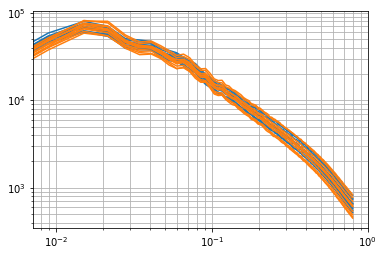

In [189]:
plt.plot(k, pgell[..., 0].T, 'C0')
plt.plot(k, pgellnb[..., 0].T, 'C1')
plt.loglog()
plt.grid(which='both')

/mnt/home/cmodi/miniconda3/envs/defpyn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/mnt/home/cmodi/miniconda3/envs/defpyn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


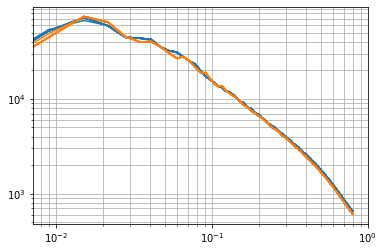

In [190]:
plt.plot(k, pgell0[..., 0].T, 'C0')
plt.plot(k, pgellnb0[..., 0].T, 'C1')
plt.loglog()
plt.grid(which='both')

In [212]:
galsum40

[{'total': 464628,
  'number density': 0.000464628,
  'centrals': 402824,
  'satellites': 61804,
  'fsat': 0.13301824255103006}]

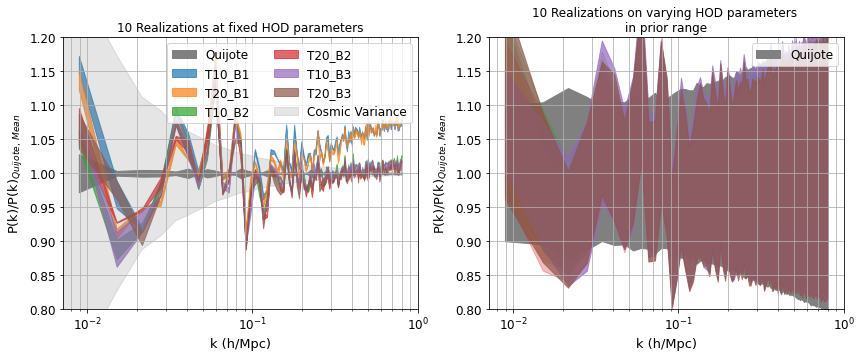

In [382]:
iell = 0 

fig = plt.figure(figsize=(14, 5))
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(121)
ax0 = fig.gca()

mu0 = pgellnb0[..., iell].mean(axis=0)

loc, scale = pgellnb0[..., iell].mean(axis=0), pgellnb0[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

loc, scale = pgell0[..., iell].mean(axis=0), pgell0[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.7, label='T10_B1')

loc, scale = pgell20[..., iell].mean(axis=0), pgell20[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.7, label='T20_B1')

loc, scale = pgell30[..., iell].mean(axis=0), pgell30[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.7, label='T10_B2')


loc, scale = pgell40[..., iell].mean(axis=0), pgell40[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.7, label='T20_B2')

loc, scale = pgell50[..., iell].mean(axis=0), pgell50[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C4', alpha=0.7, label='T10_B3')

loc, scale = pgell60[..., iell].mean(axis=0), pgell60[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C5', alpha=0.7, label='T20_B3')

plt.fill_between(k, 1-(2/modes)**.5, 1+(2/modes)**.5, alpha=0.2, color='C7', label='Cosmic Variance')

plt.title('10 Realizations at fixed HOD parameters')

##############################
plt.subplot(122)
ax1 = fig.gca()

mu0 = pgellnb[..., iell].mean(axis=0)

loc, scale = pgellnb[..., iell].mean(axis=0), pgellnb[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.3)

loc, scale = pgell2[..., iell].mean(axis=0), pgell2[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.3)

loc, scale = pgell3[..., iell].mean(axis=0), pgell3[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.3)

loc, scale = pgell4[..., iell].mean(axis=0), pgell4[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.3)

loc, scale = pgell5[..., iell].mean(axis=0), pgell5[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C4', alpha=0.7)

loc, scale = pgell6[..., iell].mean(axis=0), pgell6[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C5', alpha=0.7)

plt.title('10 Realizations on varying HOD parameters \nin prior range')

for axis in [ax0, ax1]:   
    axis.semilogx()
    axis.grid(True, which='both')
    axis.set_ylabel('P(k)/P(k)$_{Quijote,\, Mean}$', fontsize=13)
    axis.set_xlabel('k (h/Mpc)', fontsize=13)
    axis.tick_params(labelsize=12)
    axis.set_ylim(0.8, 1.2)
    axis.legend(ncol=2, fontsize=12)

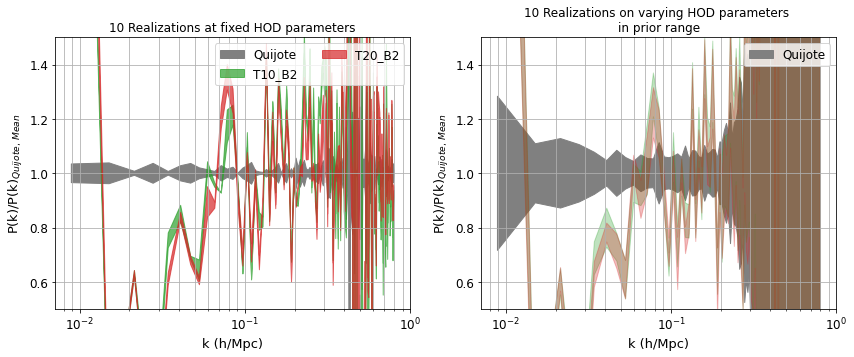

In [284]:
iell = 1

fig = plt.figure(figsize=(14, 5))
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(121)
ax0 = fig.gca()

mu0 = pgellnb0[..., iell].mean(axis=0)
mu0cv = pgellnb0[..., iell].mean(axis=0)
# mu0cv = 1
mu0 = 1

loc, scale = pgellnb0[..., iell].mean(axis=0), pgellnb0[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

# loc, scale = pgell0[..., iell].mean(axis=0), pgell0[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.7, label='T10_B1')

# loc, scale = pgell20[..., iell].mean(axis=0), pgell20[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.7, label='T20_B1')

loc, scale = pgell30[..., iell].mean(axis=0), pgell30[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.7, label='T10_B2')


loc, scale = pgell40[..., iell].mean(axis=0), pgell40[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.7, label='T20_B2')

loc, scale = pgell50[..., iell].mean(axis=0), pgell50[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C4', alpha=0.7, label='T10_B3')


loc, scale = pgell60[..., iell].mean(axis=0), pgell60[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C5', alpha=0.7, label='T20_B3')

# plt.fill_between(k, mu0cv*(1-(2/modes)**.5), mu0cv*(1+(2/modes)**.5), alpha=0.2, color='C7', label='Cosmic Variance')

plt.title('10 Realizations at fixed HOD parameters')

##############################
plt.subplot(122)
ax1 = fig.gca()

mu0 = pgellnb[..., iell].mean(axis=0)
mu0 = 1

loc, scale = pgellnb[..., iell].mean(axis=0), pgellnb[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

# loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.3)

# loc, scale = pgell2[..., iell].mean(axis=0), pgell2[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.3)

loc, scale = pgell3[..., iell].mean(axis=0), pgell3[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.3)

loc, scale = pgell4[..., iell].mean(axis=0), pgell4[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.3)

loc, scale = pgell5[..., iell].mean(axis=0), pgell5[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C4', alpha=0.7, label='T10_B3')


loc, scale = pgell6[..., iell].mean(axis=0), pgell6[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C5', alpha=0.7, label='T20_B3')


plt.title('10 Realizations on varying HOD parameters \nin prior range')

for axis in [ax0, ax1]:   
    axis.grid(True, which='both')
    axis.set_ylabel('P(k)/P(k)$_{Quijote,\, Mean}$', fontsize=13)
    axis.set_xlabel('k (h/Mpc)', fontsize=13)
    axis.tick_params(labelsize=12)
    axis.legend(ncol=2, fontsize=12)
    
    axis.loglog()
    axis.set_ylim(20, 1e5) #l=1
    # axis.set_ylim(20, 1e4) #l=2
#     axis.semilogx()
#     axis.set_ylim(0.5, 1.5) #l=1
    

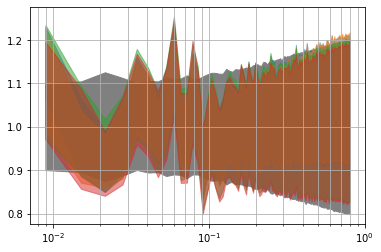

In [192]:
iell = 0 

mu0 = pgellnb[..., iell].mean(axis=0)
# mu0 *= k
# mu0 = 1.

loc, scale = pgellnb[..., iell].mean(axis=0), pgellnb[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
# l0, l1 = l0*k, l1*k
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1)

loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
# l0, l1 = l0*k, l1*k
plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.5)

loc, scale = pgell2[..., iell].mean(axis=0), pgell2[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.5)

loc, scale = pgell3[..., iell].mean(axis=0), pgell3[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.5)

loc, scale = pgell4[..., iell].mean(axis=0), pgell4[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.5)

plt.semilogx()
plt.grid(which='both')

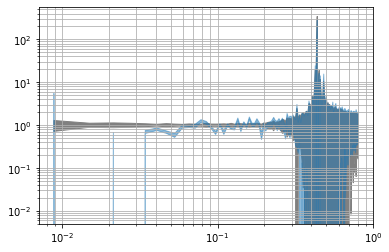

In [110]:
iell = 1 

mu0 = pgellnb[..., iell].mean(axis=0)
mu0 *= k
# mu0 = 1.

loc, scale = pgellnb[..., iell].mean(axis=0), pgellnb[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
l0, l1 = l0*k, l1*k
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1)

loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
l0, l1 = l0*k, l1*k
plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.5)

# loc, scale = pgell2[..., iell].mean(axis=0), pgell2[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.5)

# loc, scale = pgell3[..., iell].mean(axis=0), pgell3[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.5)

# loc, scale = pgell4[..., iell].mean(axis=0), pgell4[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.5)

plt.loglog()

# loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.5)

# loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.5)

# plt.plot(k, (pgellnb[..., 0]/mu[:, 0]).T, 'C1')
# plt.semilogx()
plt.grid(which='both')

# Abundance match catalogs

In [291]:
apg, apgell, agalsum = sample_hod_local(convert_to_hcat(cat.copy(), mass_match=True))
apg2, apgell2, agalsum2 = sample_hod_local(convert_to_hcat(cat2.copy(), mass_match=True))
apg3, apgell3, agalsum3 = sample_hod_local(convert_to_hcat(cat3.copy(), mass_match=True))
apg4, apgell4, agalsum4 = sample_hod_local(convert_to_hcat(cat4.copy(), mass_match=True))


Halo number density and halo fraction used :  12.73269 0.3337864975900615
mcut, M1 :  13.187371826171875 14.464445495647716
Halo number density and halo fraction used :  12.63978 0.33624002949418424
mcut, M1 :  13.187371826171875 14.464445495647716
Halo number density and halo fraction used :  21.49558 0.19771506514362489
mcut, M1 :  13.187371826171875 14.464445495647716
Halo number density and halo fraction used :  21.45464 0.19809234738965556
mcut, M1 :  13.187371826171875 14.464445495647716


In [292]:
apg0, apgell0, agalsum0 = sample_hod_local(convert_to_hcat(cat.copy(), mass_match=True), fixed_hod=True)
apg20, apgell20, agalsum20 = sample_hod_local(convert_to_hcat(cat2.copy(), mass_match=True), fixed_hod=True)
apg30, apgell30, agalsum30 = sample_hod_local(convert_to_hcat(cat3.copy(), mass_match=True), fixed_hod=True)
apg40, apgell40, agalsum40 = sample_hod_local(convert_to_hcat(cat4.copy(), mass_match=True), fixed_hod=True)


Halo number density and halo fraction used :  12.73269 0.3337864975900615
mcut, M1 :  13.187371826171875 14.464445495647716
Halo number density and halo fraction used :  12.63978 0.33624002949418424
mcut, M1 :  13.187371826171875 14.464445495647716
Halo number density and halo fraction used :  21.49558 0.19771506514362489
mcut, M1 :  13.187371826171875 14.464445495647716
Halo number density and halo fraction used :  21.45464 0.19809234738965556
mcut, M1 :  13.187371826171875 14.464445495647716


/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:5274: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:5275: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:5278: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/mnt/home/cmodi/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:5280: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N+2:, 1] = dep2slice[::-1]
/mnt/home/cmodi/miniconda3/envs/defpyn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


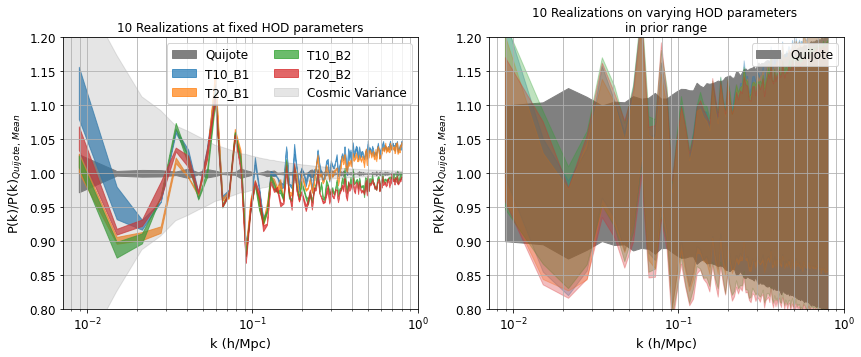

In [293]:
iell = 0 

fig = plt.figure(figsize=(14, 5))
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(121)
ax0 = fig.gca()

mu0 = pgellnb0[..., iell].mean(axis=0)

loc, scale = pgellnb0[..., iell].mean(axis=0), pgellnb0[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

loc, scale = apgell0[..., iell].mean(axis=0), apgell0[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.7, label='T10_B1')

loc, scale = apgell20[..., iell].mean(axis=0), apgell20[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.7, label='T20_B1')

loc, scale = apgell30[..., iell].mean(axis=0), apgell30[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.7, label='T10_B2')


loc, scale = apgell40[..., iell].mean(axis=0), apgell40[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.7, label='T20_B2')

plt.fill_between(k, 1-(2/modes)**.5, 1+(2/modes)**.5, alpha=0.2, color='C7', label='Cosmic Variance')

plt.title('10 Realizations at fixed HOD parameters')

##############################
plt.subplot(122)
ax1 = fig.gca()

mu0 = pgellnb[..., iell].mean(axis=0)

loc, scale = pgellnb[..., iell].mean(axis=0), pgellnb[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

loc, scale = apgell[..., iell].mean(axis=0), apgell[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.3)

loc, scale = apgell2[..., iell].mean(axis=0), apgell2[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.3)

loc, scale = apgell3[..., iell].mean(axis=0), apgell3[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.3)

loc, scale = apgell4[..., iell].mean(axis=0), apgell4[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.3)

plt.title('10 Realizations on varying HOD parameters \nin prior range')

for axis in [ax0, ax1]:   
    axis.semilogx()
    axis.grid(True, which='both')
    axis.set_ylabel('P(k)/P(k)$_{Quijote,\, Mean}$', fontsize=13)
    axis.set_xlabel('k (h/Mpc)', fontsize=13)
    axis.tick_params(labelsize=12)
    axis.set_ylim(0.8, 1.2)
    axis.legend(ncol=2, fontsize=12)

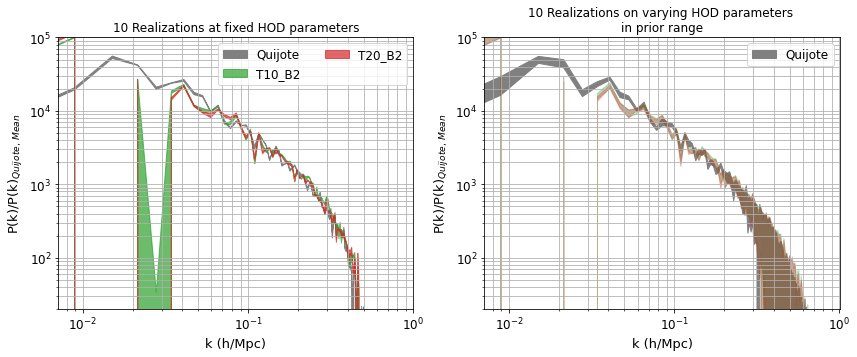

In [297]:
iell = 1

fig = plt.figure(figsize=(14, 5))
# fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(121)
ax0 = fig.gca()

mu0 = pgellnb0[..., iell].mean(axis=0)
mu0cv = pgellnb0[..., iell].mean(axis=0)
# mu0cv = 1
mu0 = 1

loc, scale = pgellnb0[..., iell].mean(axis=0), pgellnb0[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

# loc, scale = pgell0[..., iell].mean(axis=0), pgell0[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.7, label='T10_B1')

# loc, scale = pgell20[..., iell].mean(axis=0), pgell20[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.7, label='T20_B1')

loc, scale = pgell30[..., iell].mean(axis=0), pgell30[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.7, label='T10_B2')


loc, scale = pgell40[..., iell].mean(axis=0), pgell40[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.7, label='T20_B2')

# plt.fill_between(k, mu0cv*(1-(2/modes)**.5), mu0cv*(1+(2/modes)**.5), alpha=0.2, color='C7', label='Cosmic Variance')

plt.title('10 Realizations at fixed HOD parameters')

##############################
plt.subplot(122)
ax1 = fig.gca()

mu0 = pgellnb[..., iell].mean(axis=0)
mu0 = 1

loc, scale = pgellnb[..., iell].mean(axis=0), pgellnb[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='gray', alpha=1, label='Quijote')

# loc, scale = pgell[..., iell].mean(axis=0), pgell[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C0', alpha=0.3)

# loc, scale = pgell2[..., iell].mean(axis=0), pgell2[..., iell].std(axis=0)
# l0, l1 = loc-scale, loc+scale
# plt.fill_between(k, l0/mu0, l1/mu0, color='C1', alpha=0.3)

loc, scale = pgell3[..., iell].mean(axis=0), pgell3[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C2', alpha=0.3)

loc, scale = pgell4[..., iell].mean(axis=0), pgell4[..., iell].std(axis=0)
l0, l1 = loc-scale, loc+scale
plt.fill_between(k, l0/mu0, l1/mu0, color='C3', alpha=0.3)

plt.title('10 Realizations on varying HOD parameters \nin prior range')

for axis in [ax0, ax1]:   
    axis.grid(True, which='both')
    axis.set_ylabel('P(k)/P(k)$_{Quijote,\, Mean}$', fontsize=13)
    axis.set_xlabel('k (h/Mpc)', fontsize=13)
    axis.tick_params(labelsize=12)
    axis.legend(ncol=2, fontsize=12)
    
    axis.loglog()
    axis.set_ylim(20, 1e5) #l=1
    # axis.set_ylim(20, 1e4) #l=2
    
    # axis.semilogx()
    # axis.set_ylim(0.5, 1.5) #l=1
    

# Check sigma8

In [ ]:
print(np.load('/mnt/ceph/users/cmodi/Quijote/params_fid.npy'))

import mcfit
from scipy.interpolate import CubicSpline
klin, plin = np.loadtxt('/mnt/home/cmodi/Research/Projects/fastpm/runs/CAMB_matterpow_0.dat').T
R, var = mcfit.TophatVar(klin, lowring=True)(plin, extrap=True);
varR = CubicSpline(R, var)
sigma8 = numpy.sqrt(varR(8))
sigma8

# generate IC

In [299]:
(100005 - 5)/10000

10.0

In [174]:
path2 = '/mnt/home/cmodi/Research/Projects/paco_2lpt/fiducial/'
path2 = '/mnt/ceph/users/cmodi/ics_quijote/fiducial/100005/'
# read a particular coordinate file
f_in = path2 + 'Coordinates_ptype_1.1'
f = open(f_in, 'rb')
Nfiles = np.fromfile(f, dtype=np.int32, count=1)[0] #Number of coordinate subfiles	
Nmesh  = np.fromfile(f, dtype=np.int32, count=1)[0] #Nmesh size
Nx     = np.fromfile(f, dtype=np.int32, count=1)[0] #slab offset (not used)
coordinates = np.fromfile(f, dtype=np.int64, count=-1)

coordinates

array([1056768, 1056769, 1056770, ..., 2113533, 2113534, 2113535])

In [305]:
11*10 + 5

115

In [175]:
f_in = path2 + 'ics.0'
f = open(f_in, 'rb')


In [176]:
# get the Nx, Ny, Nz coordinates of the modes
kx = (coordinates//(Nmesh//2 + 1))//Nmesh
ky = (coordinates//(Nmesh//2 + 1))%Nmesh
kz = (coordinates%(Nmesh//2 + 1))%Nmesh

0 16 256 16
1 16 256 16
2 16 256 16
3 16 256 16
4 16 256 16
5 16 256 16
6 16 256 16
7 16 256 16
8 16 256 16
9 16 256 16
10 16 256 16
11 16 256 16
12 16 256 16
13 16 256 16
14 16 256 16
15 16 256 16


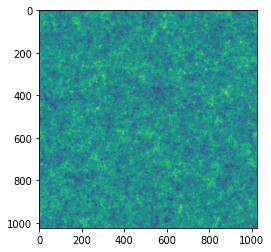

In [422]:
nfiles = 16
# path2 = '/mnt/ceph/users/cmodi/ics_quijote/fiducial/100005/'
path2 = '/mnt/ceph/users/cmodi/ics_quijote/fiducial/5-256//'
# path2 = '/mnt/ceph/users/cmodi/ics_quijote/fiducial/5//'
# path2 = '/mnt/ceph/users/cmodi/ics_quijote/latin_hypercube_HR/0/ICs/'

idx = []
amp, phase = [], []
for i in range(nfiles):
    # read a particular coordinate file
    f_in = path2 + 'Coordinates_ptype_1.%d'%i
    f = open(f_in, 'rb')
    Nfiles = np.fromfile(f, dtype=np.int32, count=1)[0] #Number of coordinate subfiles	
    Nmesh  = np.fromfile(f, dtype=np.int32, count=1)[0] #Nmesh size
    Nx     = np.fromfile(f, dtype=np.int32, count=1)[0] #slab offset (not used)
    print(i, Nfiles, Nmesh, Nx)
    coordinates = np.fromfile(f, dtype=np.int64, count=-1)
    kx = (coordinates//(Nmesh//2 + 1))//Nmesh
    ky = (coordinates//(Nmesh//2 + 1))%Nmesh
    kz = (coordinates%(Nmesh//2 + 1))%Nmesh
    kk = np.array([kx, ky, kz]).T
    idx.append(kk)

    f_in = path2 + 'Amplitudes_ptype_1.%d'%i
    f = open(f_in,'rb')
    Nfiles = np.fromfile(f, dtype=np.int32, count=1)[0] #Number of coordinate subfiles	
    Nmesh  = np.fromfile(f, dtype=np.int32, count=1)[0] #Nmesh size
    Nx     = np.fromfile(f, dtype=np.int32, count=1)[0] #slab offset (not used)
    aa = np.fromfile(f, dtype=np.float32, count=-1)
    amp.append(aa)
    
    f_in = path2 + 'Phases_ptype_1.%d'%i
    f = open(f_in,'rb')
    Nfiles = np.fromfile(f, dtype=np.int32, count=1)[0] #Number of coordinate subfiles	
    Nmesh  = np.fromfile(f, dtype=np.int32, count=1)[0] #Nmesh size
    Nx     = np.fromfile(f, dtype=np.int32, count=1)[0] #slab offset (not used)
    phase.append(np.fromfile(f, dtype=np.float32, count=-1))

idx = np.concatenate(idx)
amp = np.concatenate(amp)
phase = np.concatenate(phase)

val = amp*np.exp(1j*phase)
cmesh = val.reshape(Nmesh, Nmesh, kz.max()+1)
mesh2 = np.fft.irfftn(cmesh, norm='ortho') * Nmesh**1.5
plt.imshow(mesh.sum(axis=0))

# np.save(path2 + 'linear_field', mesh)

In [418]:
amp

array([0.0000000e+00, 2.7979799e-03, 2.8897228e-03, ..., 6.5031403e-05,
       6.7507528e-05, 0.0000000e+00], dtype=float32)

In [396]:
# val = amp*np.exp(1j*phase)
# cmesh = val.reshape(Nmesh, Nmesh, kz.max()+1)
# mesh = np.fft.irfftn(cmesh, norm='ortho') * Nmesh**1.5
# plt.imshow(mesh.sum(axis=0))

KeyboardInterrupt: 

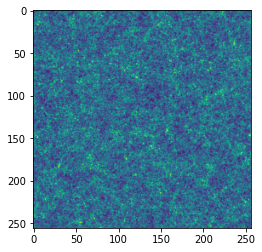

In [329]:
plt.imshow(meshnb[...].sum(axis=0))

In [434]:
catq['Position'].compute()

array([[184.27502, 780.2769 , 775.1941 ],
       [686.03674, 536.87396, 427.72552],
       [755.2985 , 510.03195,  57.31019],
       ...,
       [927.74036, 991.0769 , 500.12753],
       [860.0925 , 756.19525, 916.46814],
       [751.5944 , 927.2326 , 608.0933 ]], dtype=float32)

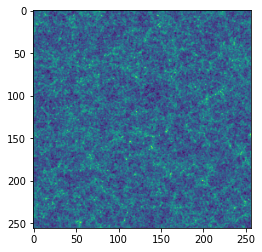

In [443]:
mesh2 = pm.paint(catq['Position'].compute())
mesh2/= mesh2.cmean()
# mesh2 = mesh2*0 + mesh
plt.imshow(mesh2[...].sum(axis=0))

In [444]:
mesh2.cmean()

1.0

In [445]:
p0 = FFTPower(meshnb/meshnb.cmean(), mode='1d').power['power']
p1 = FFTPower(mesh2, mode='1d').power['power']
px = FFTPower(meshnb/meshnb.cmean(), second=mesh2,mode='1d').power['power']

/mnt/home/cmodi/miniconda3/envs/defpyn/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


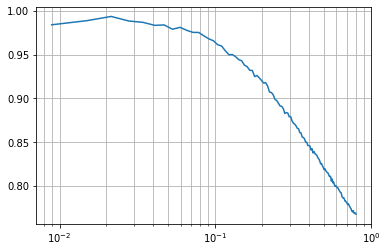

In [446]:
plt.plot(k, px/(p0*p1)**0.5)
plt.semilogx()
plt.grid(which='both')

In [11]:
import sys
sys.path.append('../../galference/utils//')
import tools

In [71]:
k, p = tools.power(mesh, boxsize=1000)
k2, p2 = tools.power(mesh2, boxsize=1000)

Add 1 to get nonzero mean of -1.952e-18
Add 1 to get nonzero mean of -1.026e-21


In [39]:
mesh.shape

(256, 256, 256)

In [40]:
klin, plin = np.loadtxt('/mnt/ceph/users/cmodi/ics_quijote/fiducial/CAMB_TABLES/CAMB_matterpow_0.dat').T

In [48]:
# mesh2 = mesh.copy()

In [69]:
bs = 1000
nc = 128
nc2 = 256


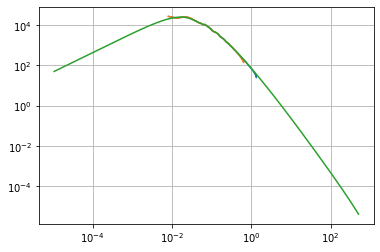

In [72]:
plt.plot(k2[:-10], nc2**3 * p2[:-10])
# plt.plot(k[:-10], nc**3 * p[:-10])
plt.plot(k[:-10],  p[:-10])
plt.plot(klin, plin)
plt.loglog()
plt.grid(which='both')

In [57]:
p[:10]/p2[:10]

array([nan,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.])

In [383]:
# np.interp(k, klin, plin)/p

In [409]:
fmesh = BigFileMesh('/mnt/ceph/users/cmodi/fastpm/L1000_N0256_B02_T10_S0100/linear/', 'LinearDensityK')
fmesh2 = BigFileMesh('/mnt/ceph/users/cmodi/fastpm/L1000_N0256_B01_T10_S0555//linear/', 'LinearDensityK')


In [411]:
fmesh.compute()/fmesh2.compute()

RealField:array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., .

In [394]:
from nbodykit.lab import ArrayMesh

In [427]:
# amesh = ArrayMesh(mesh, BoxSize=[bs, bs, bs])
amesh = ArrayMesh(mesh, BoxSize=[bs, bs, bs])

In [424]:
path2

'/mnt/ceph/users/cmodi/ics_quijote/fiducial/5-256//'

In [430]:
path2 = '/mnt/ceph/users/cmodi/ics_quijote/fiducial/5//'
# amesh.save(path2 + 'linear', dataset='LinearDensityK', mode='complex') 
# amesh.save(path2 + 'linear', dataset='LinearDensityK') 

In [429]:
amesh.attrs

{'BoxSize': array([1000., 1000., 1000.]), 'Nmesh': array([1024, 1024, 1024])}